<a href="https://colab.research.google.com/github/shubhamshinde3/DL_collab/blob/main/Regresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Deep_learning/boston.csv")

In [44]:
df.shape

(506, 14)

In [46]:
#df.head()
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
446,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666.0,20.2,318.01,17.79,14.9
285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300.0,15.3,394.72,8.23,22.0
87,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3,247.0,18.5,395.15,8.44,22.2
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403.0,14.7,356.99,28.32,17.8
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [47]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


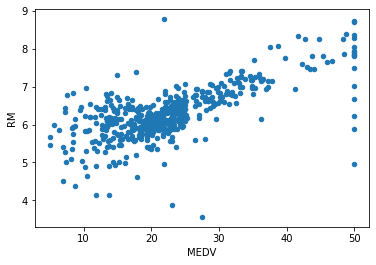

In [29]:
df.plot.scatter('MEDV', 'RM')

**As the Avg of number of rooms per dwelling increasing median value also increasing**

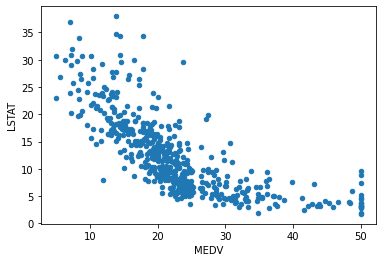

In [42]:
df.plot.scatter('MEDV', 'LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


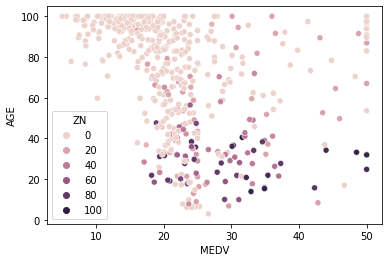

In [33]:

sns.scatterplot(df['MEDV'], df['AGE'], hue=df['ZN'])

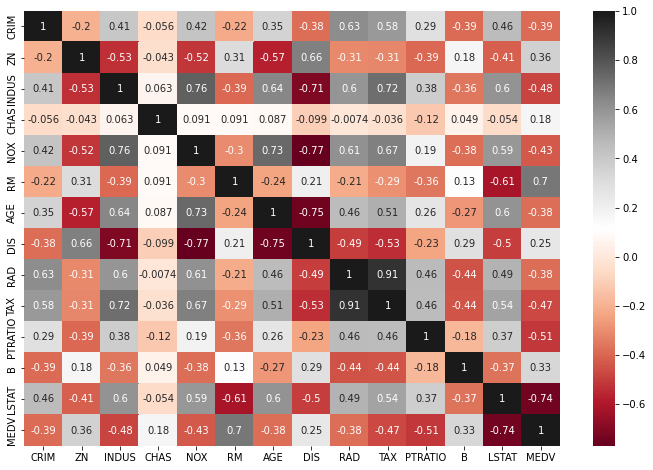

In [36]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy', annot=True)

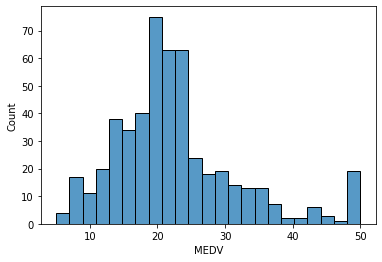

In [39]:
sns.histplot(df['MEDV'], legend=True)
#

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


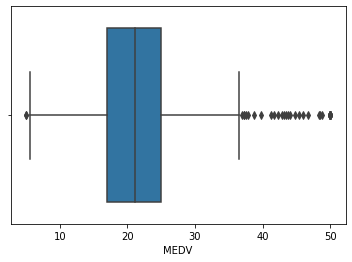

In [61]:
sns.boxplot(df['MEDV'])

**Traning the model**

In [92]:
X = df[['RM','LSTAT']]
y = df['MEDV']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 2)
(167, 2)
(339,)
(167,)


In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [97]:
y_train_pred = lm.predict(X_train)

In [98]:
'''print('MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))'''
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("R2:", metrics.r2_score(y_train, y_train_pred))

RMSE: 5.600021328412034
R2: 0.6442173283364879


In [99]:
y_test_pred = lm.predict(X_test)

In [100]:
from sklearn import metrics

'''print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))'''
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("R2:", metrics.r2_score(y_train, y_train_pred))

RMSE: 5.38244834726787
R2: 0.6442173283364879


Text(0, 0.5, 'Predicted Y')

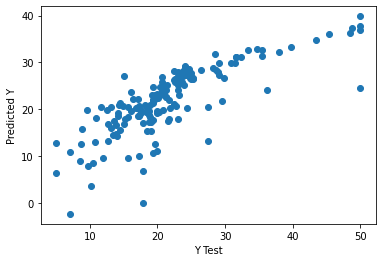

In [101]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')